In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from IPython.display import display
from pandas import ExcelWriter

## Load the Data

In [50]:
wind_data = pd.read_csv('la-haute-borne-data-2013-2016.csv',sep=';')

In [51]:
# Splitting data based on wind turbine (1-4)

turbine_names = wind_data.Wind_turbine_name.unique()
turbine_1 = wind_data.loc[wind_data['Wind_turbine_name'] == turbine_names[0]]
turbine_2 = wind_data.loc[wind_data['Wind_turbine_name'] == turbine_names[1]]
turbine_3 = wind_data.loc[wind_data['Wind_turbine_name'] == turbine_names[2]]
turbine_4 = wind_data.loc[wind_data['Wind_turbine_name'] == turbine_names[3]]

# Cleaning each turbine data by removing Nan's in the wind speed column
turbine_1_clean = turbine_1[np.isfinite(turbine_1['Ws1_avg'])]
turbine_2_clean = turbine_2[np.isfinite(turbine_2['Ws1_avg'])]
turbine_3_clean = turbine_3[np.isfinite(turbine_3['Ws1_avg'])]
turbine_4_clean = turbine_4[np.isfinite(turbine_4['Ws1_avg'])]

# Defining the columns to keep
cols_2_keep = ['Date_time', 'P_avg', 'P_min', 'P_max', 'P_std', 'Ws1_avg', 'Ws1_min', 'Ws1_max', 'Ws1_std', 'Ws2_avg', 'Ws2_min', \
               'Ws2_max', 'Ws2_std', 'Ws_avg', 'Ws_min', 'Ws_max', 'Ws_std']

# Choosing only required columns
turbine_1_ultimate = turbine_1_clean.loc[:, cols_2_keep]
turbine_2_ultimate = turbine_2_clean.loc[:, cols_2_keep]
turbine_3_ultimate = turbine_3_clean.loc[:, cols_2_keep]
turbine_4_ultimate = turbine_4_clean.loc[:, cols_2_keep]

In [52]:
# Converting date_time column to datetime variable and picking out day,month,hour,minute and year
turbine_1_ultimate['Date_time'] = pd.to_datetime(turbine_1_ultimate['Date_time'],format = '%Y-%m-%dT%H:%M:%S')
turbine_1_ultimate['Day'] = turbine_1_ultimate['Date_time'].dt.day;
turbine_1_ultimate['Month'] = turbine_1_ultimate['Date_time'].dt.month;
turbine_1_ultimate['Hour'] = turbine_1_ultimate['Date_time'].dt.hour;
turbine_1_ultimate['Minute'] = turbine_1_ultimate['Date_time'].dt.minute;
turbine_1_ultimate['Year'] = turbine_1_ultimate['Date_time'].dt.year;

turbine_2_ultimate['Date_time'] = pd.to_datetime(turbine_2_ultimate['Date_time'],format = '%Y-%m-%dT%H:%M:%S')
turbine_2_ultimate['Day'] = turbine_2_ultimate['Date_time'].dt.day;
turbine_2_ultimate['Month'] = turbine_2_ultimate['Date_time'].dt.month;
turbine_2_ultimate['Hour'] = turbine_2_ultimate['Date_time'].dt.hour;
turbine_2_ultimate['Minute'] = turbine_2_ultimate['Date_time'].dt.minute;
turbine_2_ultimate['Year'] = turbine_2_ultimate['Date_time'].dt.year;

turbine_3_ultimate['Date_time'] = pd.to_datetime(turbine_3_ultimate['Date_time'],format = '%Y-%m-%dT%H:%M:%S')
turbine_3_ultimate['Day'] = turbine_3_ultimate['Date_time'].dt.day;
turbine_3_ultimate['Month'] = turbine_3_ultimate['Date_time'].dt.month;
turbine_3_ultimate['Hour'] = turbine_3_ultimate['Date_time'].dt.hour;
turbine_3_ultimate['Minute'] = turbine_3_ultimate['Date_time'].dt.minute;
turbine_3_ultimate['Year'] = turbine_3_ultimate['Date_time'].dt.year;

turbine_4_ultimate['Date_time'] = pd.to_datetime(turbine_4_ultimate['Date_time'],format = '%Y-%m-%dT%H:%M:%S')
turbine_4_ultimate['Day'] = turbine_4_ultimate['Date_time'].dt.day;
turbine_4_ultimate['Month'] = turbine_4_ultimate['Date_time'].dt.month;
turbine_4_ultimate['Hour'] = turbine_4_ultimate['Date_time'].dt.hour;
turbine_4_ultimate['Minute'] = turbine_4_ultimate['Date_time'].dt.minute;
turbine_4_ultimate['Year'] = turbine_4_ultimate['Date_time'].dt.year;

In [53]:
# Sorting the rows based on the date time

turbine_1_sorted = turbine_1_ultimate.sort_values(by = 'Date_time')
turbine_2_sorted = turbine_2_ultimate.sort_values(by = 'Date_time')
turbine_3_sorted = turbine_3_ultimate.sort_values(by = 'Date_time')
turbine_4_sorted = turbine_4_ultimate.sort_values(by = 'Date_time')

turbine_1_sorted.head()

,Date_time,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
504939,2012-12-31 23:00:00,1072.6500,757.32001,1399.74,116.47000,8.770001,6.27,11.37,0.82,9.160000,...,0.87,8.960000,6.48,11.26,0.81,31,12,23,0,2012
16021,2012-12-31 23:10:00,1061.4301,660.95001,1398.45,142.82001,8.660000,6.01,11.37,1.02,9.120000,...,1.06,8.890000,5.78,11.65,1.01,31,12,23,10,2012
320605,2012-12-31 23:20:00,1144.7900,795.96002,1529.84,162.69000,8.940000,6.08,11.29,0.99,9.450000,...,1.08,9.190000,6.10,11.33,1.01,31,12,23,20,2012
16017,2012-12-31 23:30:00,1183.9800,763.56000,1701.45,194.56000,8.870000,5.96,12.15,1.14,8.979999,...,1.19,8.920000,6.05,12.15,1.13,31,12,23,30,2012
203,2012-12-31 23:40:00,1317.5500,818.96002,1854.86,215.72000,9.440000,6.06,12.31,1.12,9.510000,...,1.17,9.479999,6.14,12.48,1.10,31,12,23,40,2012


In [54]:
turbine_1_x = turbine_1_sorted.set_index('Date_time')
turbine_2_x = turbine_2_sorted.set_index('Date_time')
turbine_3_x = turbine_3_sorted.set_index('Date_time')
turbine_4_x = turbine_4_sorted.set_index('Date_time')

turbine_1_x.head()

,P_avg,P_min,P_max,P_std,Ws1_avg,Ws1_min,Ws1_max,Ws1_std,Ws2_avg,Ws2_min,...,Ws2_std,Ws_avg,Ws_min,Ws_max,Ws_std,Day,Month,Hour,Minute,Year
Date_time,,,,,,,,,,,,,,,,,,,,,
2012-12-31 23:00:00,1072.6500,757.32001,1399.74,116.47000,8.770001,6.27,11.37,0.82,9.160000,6.68,...,0.87,8.960000,6.48,11.26,0.81,31,12,23,0,2012
2012-12-31 23:10:00,1061.4301,660.95001,1398.45,142.82001,8.660000,6.01,11.37,1.02,9.120000,5.46,...,1.06,8.890000,5.78,11.65,1.01,31,12,23,10,2012
2012-12-31 23:20:00,1144.7900,795.96002,1529.84,162.69000,8.940000,6.08,11.29,0.99,9.450000,5.89,...,1.08,9.190000,6.10,11.33,1.01,31,12,23,20,2012
2012-12-31 23:30:00,1183.9800,763.56000,1701.45,194.56000,8.870000,5.96,12.15,1.14,8.979999,5.64,...,1.19,8.920000,6.05,12.15,1.13,31,12,23,30,2012
2012-12-31 23:40:00,1317.5500,818.96002,1854.86,215.72000,9.440000,6.06,12.31,1.12,9.510000,6.10,...,1.17,9.479999,6.14,12.48,1.10,31,12,23,40,2012


In [55]:
idx = turbine_1_x.index.intersection(turbine_2_x.index)
idx2 = turbine_3_x.index.intersection(idx)
idx3 = turbine_4_x.index.intersection(idx2)

In [56]:
turbine_1_x = turbine_1_x.loc[idx3]
turbine_2_x = turbine_2_x.loc[idx3]
turbine_3_x = turbine_3_x.loc[idx3]
turbine_4_x = turbine_4_x.loc[idx3]

In [58]:
list(turbine_1_x)

['P_avg',
 'P_min',
 'P_max',
 'P_std',
 'Ws1_avg',
 'Ws1_min',
 'Ws1_max',
 'Ws1_std',
 'Ws2_avg',
 'Ws2_min',
 'Ws2_max',
 'Ws2_std',
 'Ws_avg',
 'Ws_min',
 'Ws_max',
 'Ws_std',
 'Day',
 'Month',
 'Hour',
 'Minute',
 'Year']

## Getting the X matrix as 70% of the features (sequentially)

### Right now, use turbine 1 to predict turbine 2, 3, 4


In [59]:
# Getting X vector from turbine 1 data sequentially

x_turb_1_train = turbine_1_x[0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['P_avg','Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbine_1_x[145452:]
x_turb_1_test = x_turb_1_test.loc[:,['P_avg','Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

In [60]:
# Getting Y vector from turbine 2 data

y_turb_2_train = turbine_2_x[0:145452]
y_turb_2_train = y_turb_2_train.loc[:,['P_avg']]
y_train = np.array(y_turb_2_train)

y_turb_2_test = turbine_2_x[145452:]
y_turb_2_test = y_turb_2_test.loc[:,['P_avg']]
y_test = np.array(y_turb_2_test)

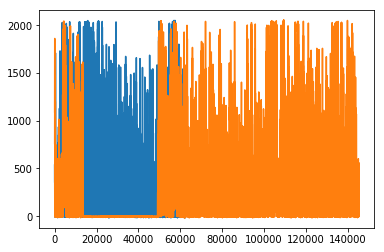

In [61]:
plt.plot(y_test)

plt.plot(y_train)

(145452, 1)
(145452, 1)


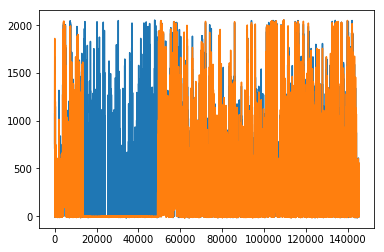

In [62]:
x_train_plot = np.array(x_turb_1_train.loc[:,['P_avg']])

plt.plot(x_train_plot)
plt.plot(y_train)

print(x_train_plot.shape)
print(y_train.shape)

In [64]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 50713.79


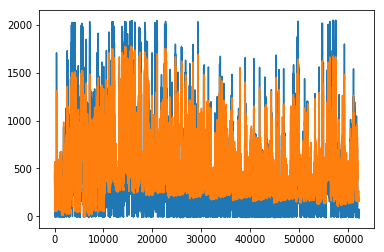

In [65]:
# Plotting them

plt.plot(y_test)
plt.plot(y_pred)

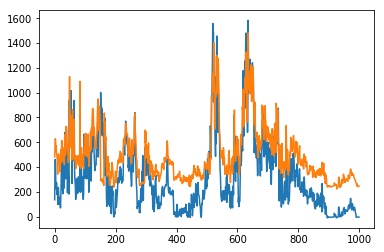

In [66]:
plt.plot(y_test[30000:31000])
plt.plot(y_pred[30000:31000])


### Doing prediction with no P_avg of turbine 1

Mean squared error: 71744.72


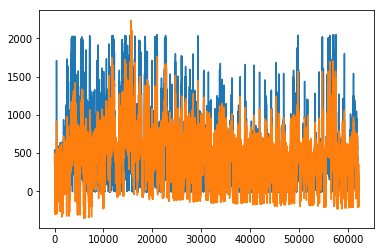

In [67]:
# Getting X vector from turbine 1 data sequentially

x_turb_1_train = turbine_1_x[0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbine_1_x[145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 2 data

y_turb_2_train = turbine_2_x[0:145452]
y_turb_2_train = y_turb_2_train.loc[:,['P_avg']]
y_train = np.array(y_turb_2_train)

y_turb_2_test = turbine_2_x[145452:]
y_turb_2_test = y_turb_2_test.loc[:,['P_avg']]
y_test = np.array(y_turb_2_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Plotting them

plt.plot(y_test)
plt.plot(y_pred)

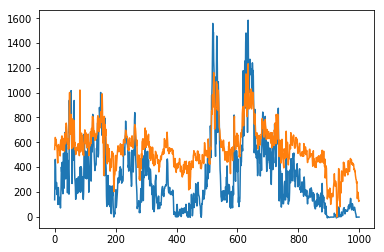

In [68]:
plt.plot(y_test[30000:31000])
plt.plot(y_pred[30000:31000])

Mean squared error: 38029.64


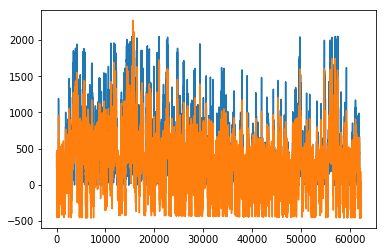

In [69]:
# Turbine 3 direct power prediction

x_turb_1_train = turbine_1_x[0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbine_1_x[145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 3 data

y_turb_3_train = turbine_3_x[0:145452]
y_turb_3_train = y_turb_3_train.loc[:,['P_avg']]
y_train = np.array(y_turb_3_train)

y_turb_3_test = turbine_3_x[145452:]
y_turb_3_test = y_turb_3_test.loc[:,['P_avg']]
y_test = np.array(y_turb_3_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Plotting them

plt.plot(y_test)
plt.plot(y_pred)

Mean squared error: 51547.92


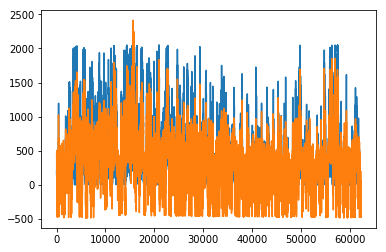

In [70]:
# Turbine 4 direct power prediction

x_turb_1_train = turbine_1_x[0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbine_1_x[145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 4 data

y_turb_4_train = turbine_4_x[0:145452]
y_turb_4_train = y_turb_4_train.loc[:,['P_avg']]
y_train = np.array(y_turb_4_train)

y_turb_4_test = turbine_4_x[145452:]
y_turb_4_test = y_turb_4_test.loc[:,['P_avg']]
y_test = np.array(y_turb_4_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Plotting them

plt.plot(y_test)
plt.plot(y_pred)

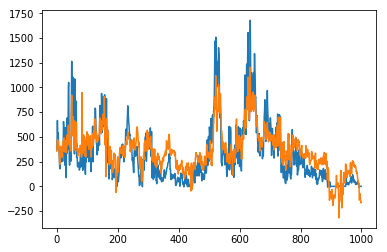

In [71]:
plt.plot(y_test[30000:31000])
plt.plot(y_pred[30000:31000])

### Plotting power curves

Text(0,0.5,'Power (P_avg)')

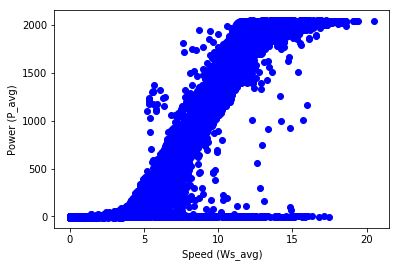

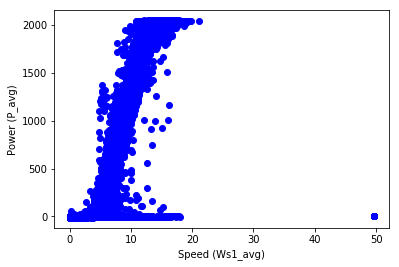

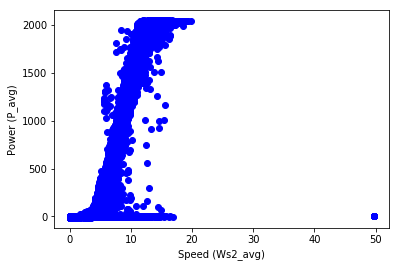

In [72]:
# Turbine 1

plt.figure(1)
plt.plot(turbine_1_x.Ws_avg, turbine_1_x.P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(2)
plt.plot(turbine_1_x.Ws1_avg, turbine_1_x.P_avg,'bo')
plt.xlabel('Speed (Ws1_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(3)
plt.plot(turbine_1_x.Ws2_avg, turbine_1_x.P_avg,'bo')
plt.xlabel('Speed (Ws2_avg)')
plt.ylabel('Power (P_avg)')

Text(0,0.5,'Power (P_avg)')

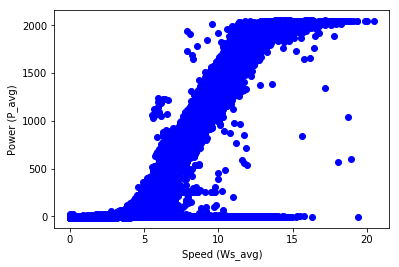

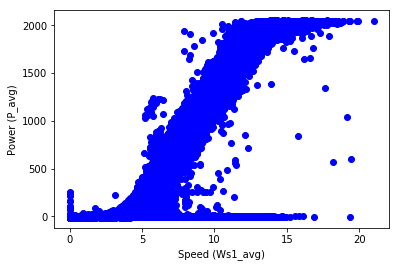

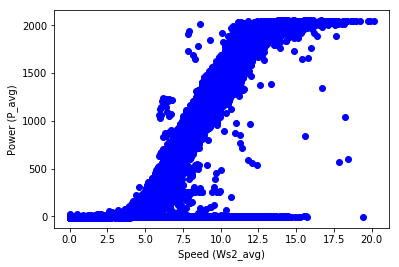

In [73]:
# Turbine 2

plt.figure(1)
plt.plot(turbine_2_x.Ws_avg, turbine_2_x.P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(2)
plt.plot(turbine_2_x.Ws1_avg, turbine_2_x.P_avg,'bo')
plt.xlabel('Speed (Ws1_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(3)
plt.plot(turbine_2_x.Ws2_avg, turbine_2_x.P_avg,'bo')
plt.xlabel('Speed (Ws2_avg)')
plt.ylabel('Power (P_avg)')

Text(0,0.5,'Power (P_avg)')

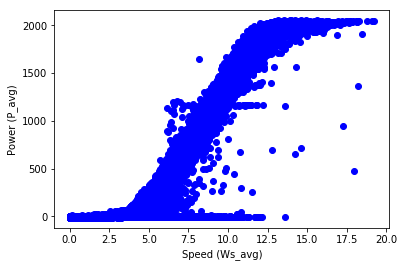

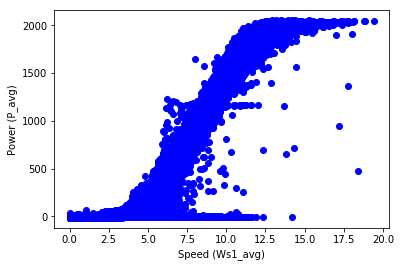

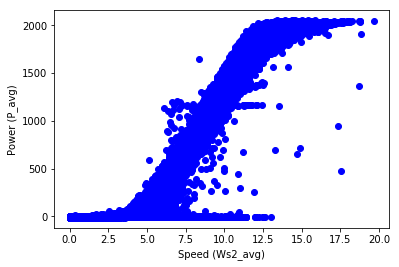

In [74]:
# Turbine 3

plt.figure(1)
plt.plot(turbine_3_x.Ws_avg, turbine_3_x.P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(2)
plt.plot(turbine_3_x.Ws1_avg, turbine_3_x.P_avg,'bo')
plt.xlabel('Speed (Ws1_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(3)
plt.plot(turbine_3_x.Ws2_avg, turbine_3_x.P_avg,'bo')
plt.xlabel('Speed (Ws2_avg)')
plt.ylabel('Power (P_avg)')

Text(0,0.5,'Power (P_avg)')

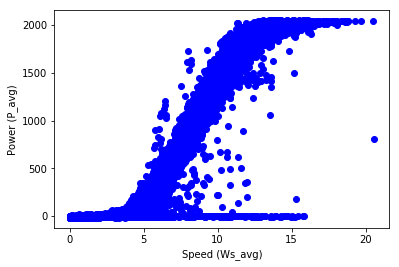

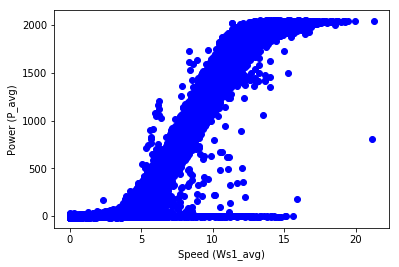

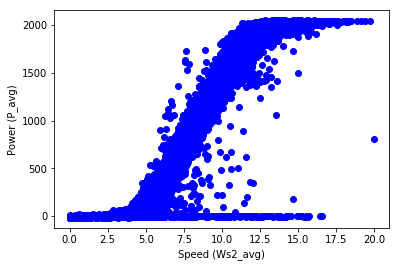

In [75]:
# Turbine 4

plt.figure(1)
plt.plot(turbine_4_x.Ws_avg, turbine_4_x.P_avg,'bo')
plt.xlabel('Speed (Ws_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(2)
plt.plot(turbine_4_x.Ws1_avg, turbine_4_x.P_avg,'bo')
plt.xlabel('Speed (Ws1_avg)')
plt.ylabel('Power (P_avg)')

plt.figure(3)
plt.plot(turbine_4_x.Ws2_avg, turbine_4_x.P_avg,'bo')
plt.xlabel('Speed (Ws2_avg)')
plt.ylabel('Power (P_avg)')

### Predicting wind speed instead of power

Mean squared error: 0.47


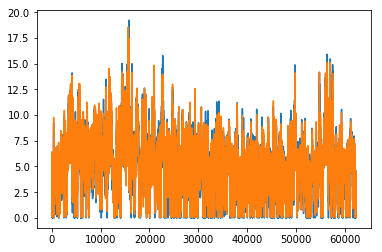

In [76]:
# Getting X vector from turbine 1 data sequentially

x_turb_1_train = turbine_1_x[0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbine_1_x[145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 3 data

y_turb_3_train = turbine_3_x[0:145452]
y_turb_3_train = y_turb_3_train.loc[:,['Ws_avg']]
y_train = np.array(y_turb_3_train)

y_turb_3_test = turbine_3_x[145452:]
y_turb_3_test = y_turb_3_test.loc[:,['Ws_avg']]
y_test = np.array(y_turb_3_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))


# Plotting them

plt.plot(y_test)
plt.plot(y_pred)

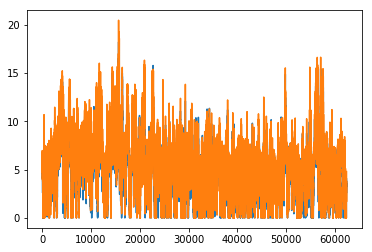

In [77]:
plt.plot(y_test)
plt.plot(np.array(turbine_1_x.Ws_avg)[145452:])

### The wind speed at the sites are pretty well correlated. We get a miniscule RMSE over the time frame (which is pretty large) So let's try using Power at 1 to predict wind speed at the other sites

Mean squared error: 1.70


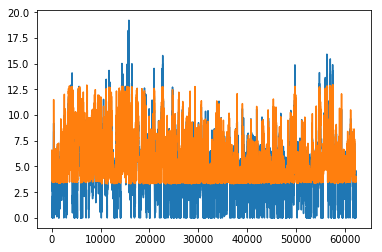

In [78]:
# Getting X vector from turbine 1 data sequentially

x_turb_1_train = turbine_1_x[0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['P_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbine_1_x[145452:]
x_turb_1_test = x_turb_1_test.loc[:,['P_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 3 data

y_turb_3_train = turbine_3_x[0:145452]
y_turb_3_train = y_turb_3_train.loc[:,['Ws_avg']]
y_train = np.array(y_turb_3_train)

y_turb_3_test = turbine_3_x[145452:]
y_turb_3_test = y_turb_3_test.loc[:,['Ws_avg']]
y_test = np.array(y_turb_3_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
turb_3_pred_ws = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, turb_3_pred_ws))


# Plotting them

plt.plot(y_test)
plt.plot(turb_3_pred_ws)

#### How is the RMSE so low, even though there's a huge part its missing?

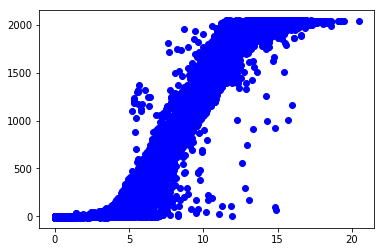

In [79]:
# Removing outliers from power curve for turbine 1

idx1 = (turbine_1_x['P_avg'] <= 0.5)
idx2 = (turbine_1_x['Ws_avg'] >= 7)
idx3 = ~(idx1 & idx2)

turbine_1_corrected = turbine_1_x[idx3]
plt.plot(turbine_1_corrected.Ws_avg, turbine_1_corrected.P_avg,'bo')

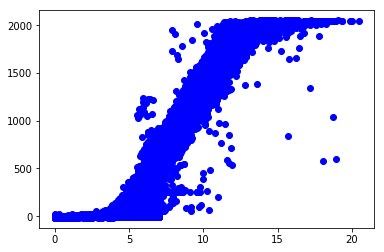

In [80]:
# Removing outliers from power curve for turbine 2

idx1 = (turbine_2_x['P_avg'] <= 50)
idx2 = (turbine_2_x['Ws_avg'] >= 7)
idx3 = ~(idx1 & idx2)

turbine_2_corrected = turbine_2_x[idx3]
plt.plot(turbine_2_corrected.Ws_avg, turbine_2_corrected.P_avg,'bo')

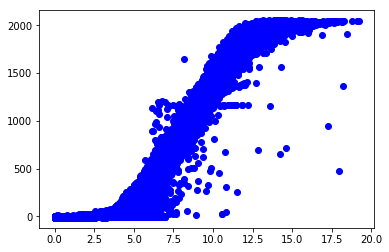

In [81]:
# Removing outliers from power curve for turbine 3

idx1 = (turbine_3_x['P_avg'] <= 10)
idx2 = (turbine_3_x['Ws_avg'] >= 7)
idx3 = ~(idx1 & idx2)

turbine_3_corrected = turbine_3_x[idx3]
plt.plot(turbine_3_corrected.Ws_avg, turbine_3_corrected.P_avg,'bo')

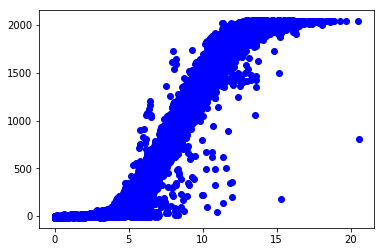

In [82]:
# Removing outliers from power curve for turbine 4

idx1 = (turbine_4_x['P_avg'] <= 0.5)
idx2 = (turbine_4_x['Ws_avg'] >= 7)
idx3 = ~(idx1 & idx2)

turbine_4_corrected = turbine_4_x[idx3]
plt.plot(turbine_4_corrected.Ws_avg, turbine_4_corrected.P_avg,'bo')

Mean squared error: 0.37


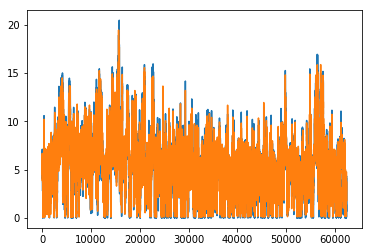

In [83]:
# Turbine 2 wind speed prediction

x_turb_1_train = turbine_1_x[0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbine_1_x[145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 2 data

y_turb_2_train = turbine_2_x[0:145452]
y_turb_2_train = y_turb_2_train.loc[:,['Ws_avg']]
y_train = np.array(y_turb_2_train)

y_turb_2_test = turbine_2_x[145452:]
y_turb_2_test = y_turb_2_test.loc[:,['Ws_avg']]
y_test = np.array(y_turb_2_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
turb_2_pred_ws = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, turb_2_pred_ws))


# Plotting them

plt.plot(y_test)
plt.plot(turb_2_pred_ws)

Mean squared error: 0.50


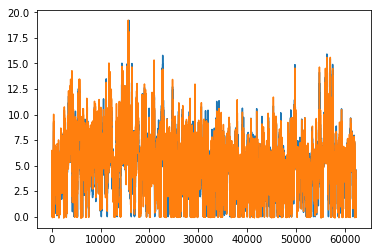

In [84]:
# Turbine 4 wind speed prediction

x_turb_1_train = turbine_1_x[0:145452]
x_turb_1_train = x_turb_1_train.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_train = np.array(x_turb_1_train)

x_turb_1_test = turbine_1_x[145452:]
x_turb_1_test = x_turb_1_test.loc[:,['Ws_avg','Year','Month','Day','Hour','Minute']]
x_test = np.array(x_turb_1_test)

# Getting Y vector from turbine 4 data

y_turb_4_train = turbine_4_x[0:145452]
y_turb_4_train = y_turb_4_train.loc[:,['Ws_avg']]
y_train = np.array(y_turb_4_train)

y_turb_4_test = turbine_4_x[145452:]
y_turb_4_test = y_turb_4_test.loc[:,['Ws_avg']]
y_test = np.array(y_turb_3_test)

# Importing the regressor
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(x_train, y_train)

# Make predictions using the testing set
turb_4_pred_ws = regr.predict(x_test)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, turb_4_pred_ws))


# Plotting them

plt.plot(y_test)
plt.plot(turb_4_pred_ws)

In [85]:
## Finding power using power curve

# Using polyfit to find power curve

coeff_1 = np.polyfit(turbine_1_corrected['Ws_avg'],turbine_1_corrected['P_avg'],9)

coeff_1

array([-4.16144939e-06,  3.83826486e-04, -1.48438630e-02,  3.10833878e-01,
       -3.77546954e+00,  2.62048925e+01, -9.52267762e+01,  1.65786526e+02,
       -1.09216130e+02,  6.34604893e+00])

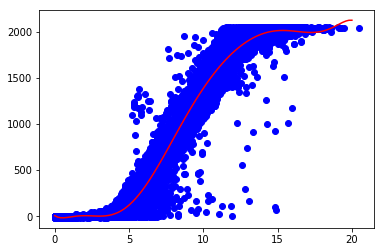

In [86]:
# Plotting to see curve

poly = np.poly1d(coeff_1)

xp = np.linspace(0, 20, 100)
plt.plot(turbine_1_corrected['Ws_avg'],turbine_1_corrected['P_avg'],'bo')
plt.plot(xp,poly(xp),'r-')

Mean squared error: 18997.57


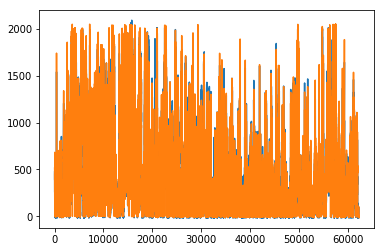

In [87]:
# Calculating power from this curve

ws_1 = turbine_1_x[145452:]
ws_1 = ws_1.loc[:,['Ws_avg']]

p_1 = turbine_1_x[145452:]
p_1 = p_1.loc[:,['P_avg']]

p_turb_1_calc = poly(ws_1)

plt.plot(np.array(p_turb_1_calc))
plt.plot(np.array(p_1))

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(p_1, p_turb_1_calc))

Mean squared error: 16053.53


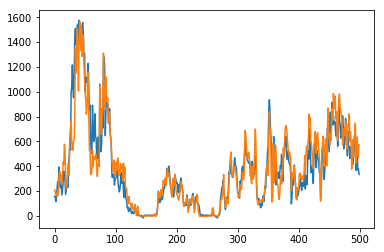

In [88]:
# Calculating power from power curve for turbine 2

coeff_2 = np.polyfit(turbine_2_corrected['Ws_avg'],turbine_2_corrected['P_avg'],9)

poly_2 = np.poly1d(coeff_2)

p_2 = turbine_2_x[145452:]
p_2 = p_2.loc[:,['P_avg']]

p_turb_2_calc = poly_2(turb_2_pred_ws)

plt.plot(np.array(p_turb_2_calc)[10000:10500])
plt.plot(np.array(p_2)[10000:10500])

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(p_2, p_turb_2_calc))

Mean squared error: 36323.24


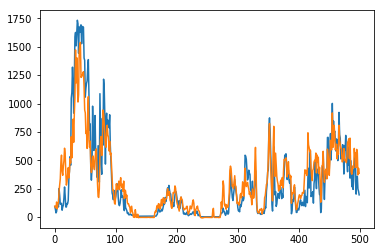

In [89]:
# Calculating power from power curve for turbine 3

coeff_3 = np.polyfit(turbine_3_corrected['Ws_avg'],turbine_3_corrected['P_avg'],9)

poly_3 = np.poly1d(coeff_3)

p_3 = turbine_3_x[145452:]
p_3 = p_3.loc[:,['P_avg']]

p_turb_3_calc = poly_3(turb_3_pred_ws)

plt.plot(np.array(p_turb_3_calc)[10000:10500])
plt.plot(np.array(p_3)[10000:10500])

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(p_3, p_turb_3_calc))

Mean squared error: 22983.61


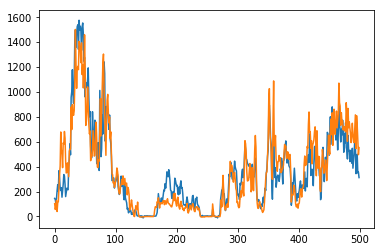

In [90]:
# Calculating power from power curve for turbine 4

coeff_4 = np.polyfit(turbine_4_corrected['Ws_avg'],turbine_4_corrected['P_avg'],9)

poly_4 = np.poly1d(coeff_4)

p_4 = turbine_4_x[145452:]
p_4 = p_4.loc[:,['P_avg']]

p_turb_4_calc = poly_4(turb_4_pred_ws)

plt.plot(np.array(p_turb_4_calc)[10000:10500])
plt.plot(np.array(p_4)[10000:10500])

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(p_4, p_turb_4_calc))

### Predicting the future

# Using historical wind speed data to predict future wind speed

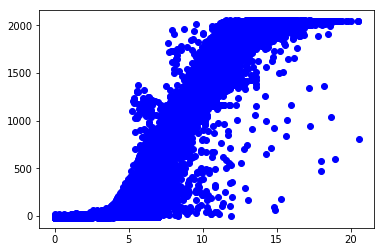

In [118]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Removing outliers from power curve for turbine 1

idx1 = (turbine_1_x['P_avg'] <= 0.5)
idx2 = (turbine_1_x['Ws_avg'] >= 7)
idx3 = ~(idx1 & idx2)

turbine_1_corrected = turbine_1_x[idx3]
plt.plot(turbine_1_corrected.Ws_avg, turbine_1_corrected.P_avg,'bo')

# Removing outliers from power curve for turbine 2

idx1 = (turbine_2_x['P_avg'] <= 50)
idx2 = (turbine_2_x['Ws_avg'] >= 7)
idx3 = ~(idx1 & idx2)

turbine_2_corrected = turbine_2_x[idx3]
plt.plot(turbine_2_corrected.Ws_avg, turbine_2_corrected.P_avg,'bo')

# Removing outliers from power curve for turbine 3

idx1 = (turbine_3_x['P_avg'] <= 10)
idx2 = (turbine_3_x['Ws_avg'] >= 7)
idx3 = ~(idx1 & idx2)

turbine_3_corrected = turbine_3_x[idx3]
plt.plot(turbine_3_corrected.Ws_avg, turbine_3_corrected.P_avg,'bo')

# Removing outliers from power curve for turbine 4

idx1 = (turbine_4_x['P_avg'] <= 0.5)
idx2 = (turbine_4_x['Ws_avg'] >= 7)
idx3 = ~(idx1 & idx2)

turbine_4_corrected = turbine_4_x[idx3]
plt.plot(turbine_4_corrected.Ws_avg, turbine_4_corrected.P_avg,'bo')

In [119]:
# Using wind speed in the last month to predict wind speed in the next week

# Getting 1 month of wind speed data (this is the total data for training, just looking at one month to t)
month_data = turbine_1_corrected[:4320]
month_Ws_data = month_data.loc[:,['Ws_avg']]
month_Pavg_data = month_data.loc[:,['P_avg']]
month_Ws_data = np.array(month_Ws_data)
month_Pavg_data = np.array(month_Pavg_data)

# plt.plot(month_data)

mu = 4
lam = 10

sized = 4320-lam-mu

train_data_x_Ws = np.empty([sized,mu])
train_data_x_Pavg = np.empty([sized,mu])
train_data_y_Ws = np.empty([sized,1])
train_data_y_Pavg = np.empty([sized,1])

# Getting training data
for i in range(mu,4320-lam):
    train_data_x_Ws[i-mu,:] = np.hstack(month_Ws_data[i-mu:i])
    train_data_x_Pavg[i-mu,:] = np.hstack(month_Pavg_data[i-mu:i])
    train_data_y_Ws[i-mu,:] = np.hstack(month_Ws_data[i+lam])
    train_data_y_Pavg[i-mu,:] = np.hstack(month_Pavg_data[i+lam])

In [120]:
print (train_data_x[4])
print (train_data_y[1])


[9.4799995 9.4099998 9.4799995 9.2399998]
[9.0600004]


In [121]:
# Getting x_test and y_test data

# Getting 1 week of wind speed data (this is the total data for training, just looking at one month to t)
week_data = turbine_1_corrected[4320:5328]
week_Ws_data = week_data.loc[:,['Ws_avg']]
week_Pavg_data = week_data.loc[:,['P_avg']]
week_Ws_data = np.array(week_Ws_data)
week_Pavg_data = np.array(week_Pavg_data)

# plt.plot(month_data)

mu = 4
lam = 10

sized = len(week_data)-lam-mu

test_data_x_Ws = np.empty([sized,mu])
test_data_y_Ws = np.empty([sized,1])
test_data_x_Pavg = np.empty([sized,mu])
test_data_y_Pavg = np.empty([sized,1])

# Getting training data
for i in range(mu,len(week_data)-lam):
    test_data_x_Ws[i-mu,:] = np.hstack(week_Ws_data[i-mu:i])
    test_data_x_Pavg[i-mu,:] = np.hstack(week_Pavg_data[i-mu:i])
    test_data_y_Ws[i-mu,:] = np.hstack(week_Ws_data[i+lam])
    test_data_y_Pavg[i-mu,:] = np.hstack(week_Pavg_data[i+lam])

In [122]:
print (test_data_x[4])
print (test_data_y[1])

[8.8900003 9.3599997 8.8000002 7.8899999]
[8.8699999]


Mean squared error: 2.53


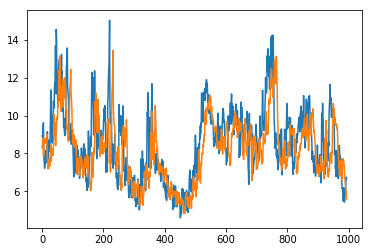

In [123]:
# Importing liner regression model
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(train_data_x_Ws, train_data_y_Ws)

# Make predictions using the testing set
y_pred = regr.predict(test_data_x_Ws)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(test_data_y, y_pred))

# Plotting them

plt.plot(np.array(test_data_y_Ws))
plt.plot(np.array(y_pred))

Mean squared error: 154044.72


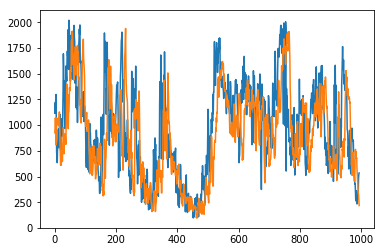

In [124]:
P_pred = poly(y_pred)
plt.plot(np.array(test_data_y_Pavg))
plt.plot(np.array(P_pred))

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(test_data_y_Pavg, P_pred))

In [131]:
len(test_data_y_Pavg)

994

In [130]:
from sklearn.utils import check_array
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = check_array(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(test_data_y_Pavg, P_pred)

ValueError: too many values to unpack (expected 2)

# use wind speed to predict power generation in the future

In [111]:
# Using wind speed in the last month to predict wind speed in the next week

# Getting 1 month of wind speed data (this is the total data for training, just looking at one month to t)
month_data = turbine_1_corrected[:4320]
month_Ws_data = month_data.loc[:,['Ws_avg']]
month_Pavg_data = month_data.loc[:,['P_avg']]
month_Ws_data = np.array(month_Ws_data)
month_Pavg_data = np.array(month_Pavg_data)

# plt.plot(month_data)

mu = 4
lam = 10

sized = 4320-lam-mu

train_data_x_Ws = np.empty([sized,mu])
train_data_x_Pavg = np.empty([sized,mu])
train_data_y_Ws = np.empty([sized,1])
train_data_y_Pavg = np.empty([sized,1])

# Getting training data
for i in range(mu,4320-lam):
    train_data_x_Ws[i-mu,:] = np.hstack(month_Ws_data[i-mu:i])
    train_data_x_Pavg[i-mu,:] = np.hstack(month_Pavg_data[i-mu:i])
    train_data_y_Ws[i-mu,:] = np.hstack(month_Ws_data[i+lam])
    train_data_y_Pavg[i-mu,:] = np.hstack(month_Pavg_data[i+lam])

In [112]:
# Getting x_test and y_test data

# Getting 1 week of wind speed data (this is the total data for training, just looking at one month to t)
week_data = turbine_1_corrected[4320:5328]
week_Ws_data = week_data.loc[:,['Ws_avg']]
week_Pavg_data = week_data.loc[:,['P_avg']]
week_Ws_data = np.array(week_Ws_data)
week_Pavg_data = np.array(week_Pavg_data)

# plt.plot(month_data)

mu = 4
lam = 10

sized = len(week_data)-lam-mu

test_data_x_Ws = np.empty([sized,mu])
test_data_y_Ws = np.empty([sized,1])
test_data_x_Pavg = np.empty([sized,mu])
test_data_y_Pavg = np.empty([sized,1])

# Getting training data
for i in range(mu,len(week_data)-lam):
    test_data_x_Ws[i-mu,:] = np.hstack(week_Ws_data[i-mu:i])
    test_data_x_Pavg[i-mu,:] = np.hstack(week_Pavg_data[i-mu:i])
    test_data_y_Ws[i-mu,:] = np.hstack(week_Ws_data[i+lam])
    test_data_y_Pavg[i-mu,:] = np.hstack(week_Pavg_data[i+lam])

Mean squared error: 148418.52


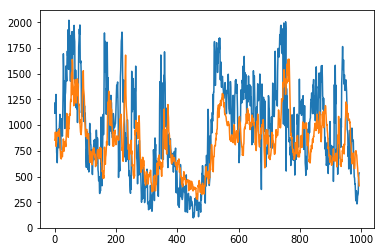

In [127]:
# Importing liner regression model
regr = linear_model.LinearRegression()

# Fitting the training data
regr.fit(train_data_x_Ws, train_data_y_Pavg)

# Make predictions using the testing set
y_pred = regr.predict(test_data_x_Ws)

# Finding error
print("Mean squared error: %.2f"
      % mean_squared_error(test_data_y_Pavg, y_pred))

# Plotting them

plt.plot(np.array(test_data_y_Pavg))
plt.plot(np.array(y_pred))

# Applying SVM to check on improvement